<b>¡Hola Joel!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

In [1]:
#Paso 1. Abre el archivo de datos y estudia la información general 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



In [2]:
games = pd.read_csv('/datasets/games.csv' )

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Paso 2. Prepara los datos

print (games.columns)


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [5]:
# Bucle en los encabezados poniendo todo en minúsculas

new_colums = games.columns.str.lower()

games.columns = new_colums

print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [6]:
#Convierte los datos en los tipos necesarios.

# Convertir year_of_release a entero (permitiendo valores nulos)
games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors='coerce').astype('Int64')

# Convertir user_score a numérico, primero reemplazando 'tbd' con NaN
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')


<div class="alert alert-block alert-success">
<b>Celdas [5–6]</b> <a class="tocSkip"></a><br>
Excelente decisión al estandarizar los nombres de las columnas y convertir los tipos de datos claves como <code>year_of_release</code> y <code>user_score</code>. El uso del tipo <code>Int64</code> para manejar valores nulos en fechas es una buena práctica poco común pero muy recomendable. Además, el tratamiento explícito de los valores "tbd" muestra atención al detalle y comprensión del significado semántico detrás de los datos.
</div>


para este caso convertimos year_of_release a tipo entero ya que representa un año, pero se usa el tipo Int64 de pandas para permitir valores nulos (NaN).

En user_score se encuentran valores como 'tbd' (por determinar), se convierten en NaN y luego se transforma la columna a tipo numérico (float) para permitir análisis estadístico por tratarse de un score o calificacion..

In [7]:
# Si es necesario, elige la manera de tratar los valores ausentes, conteo de valores nulos

games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

<div class="alert alert-block alert-warning">
<b>Celdas [7]</b> <a class="tocSkip"></a><br>
Aunque se identifica correctamente la naturaleza de los valores ausentes, sería valioso justificar por qué se permite que columnas como <code>critic_score</code> y <code>user_score</code> conserven tantos <code>NaN</code>. Si se van a utilizar para análisis estadísticos más adelante, podría considerarse filtrar los datos en esos momentos para evitar sesgos o errores sutiles en los cálculos.
</div>


**Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco:**

Los valores nulos en year_of_release, user_score y critic_score pueden deberse a falta de información pública o juegos muy nuevos.

**¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.**

En el caso de 'user_score', los valores "TBD" indican que aún no se ha determinado una puntuación por parte de usuarios, por lo tanto se considera correcto tratarlos como NaN.

**Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.**

No rellenamos estos valores porque podríamos introducir sesgo. Solo trabajaremos con los datos completos cuando sea necesario (por ejemplo, al hacer correlaciones o pruebas de hipótesis).

***Paso 3. Analiza los datos***

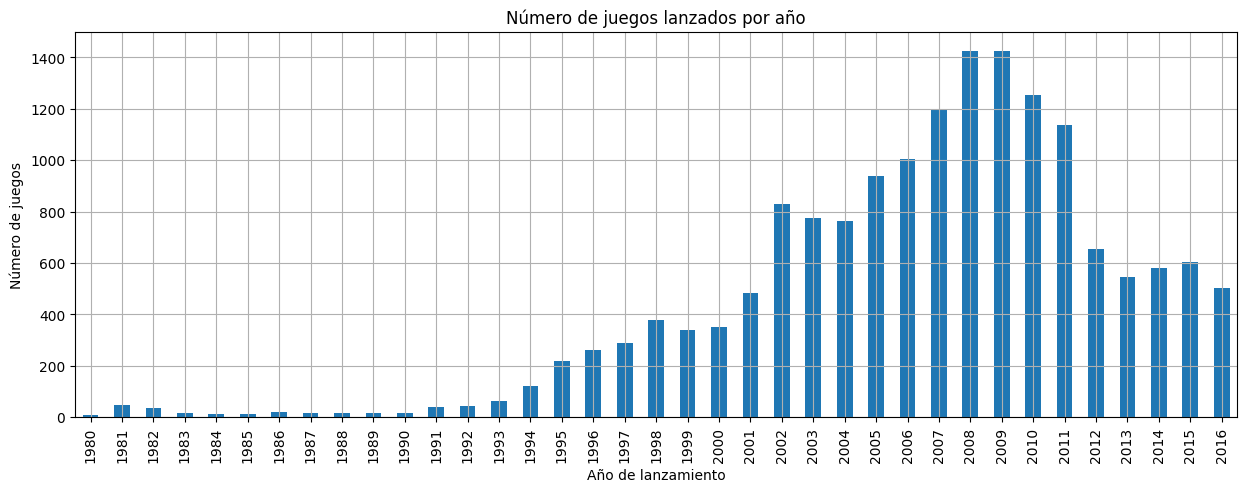

In [8]:
#Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

games_by_year = games['year_of_release'].value_counts().sort_index()
games_by_year.plot(kind='bar', figsize=(15, 5), title='Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.grid(True)
plt.show()

en la grafica podemos ver que hay aumento progresivo en el número de juegos lanzados desde los años 90 hasta un pico alrededor de 2008-2011. Después, hay una caída evidente, especialmente en 2016, probablemente porque los datos de ese año están incompletos. Los años antes de 2000 tienen datos muy por debajo, por lo que podrían no ser relevantes para el análisis.

In [9]:
'''Observa cómo varían las ventas de una plataforma a otra. 
Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año.
Busca las plataformas que solían ser populares pero que ahora no tienen ventas. 
¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?'''

# Creacion de la columna de ventas globales
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']


top_platforms = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
print(top_platforms)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


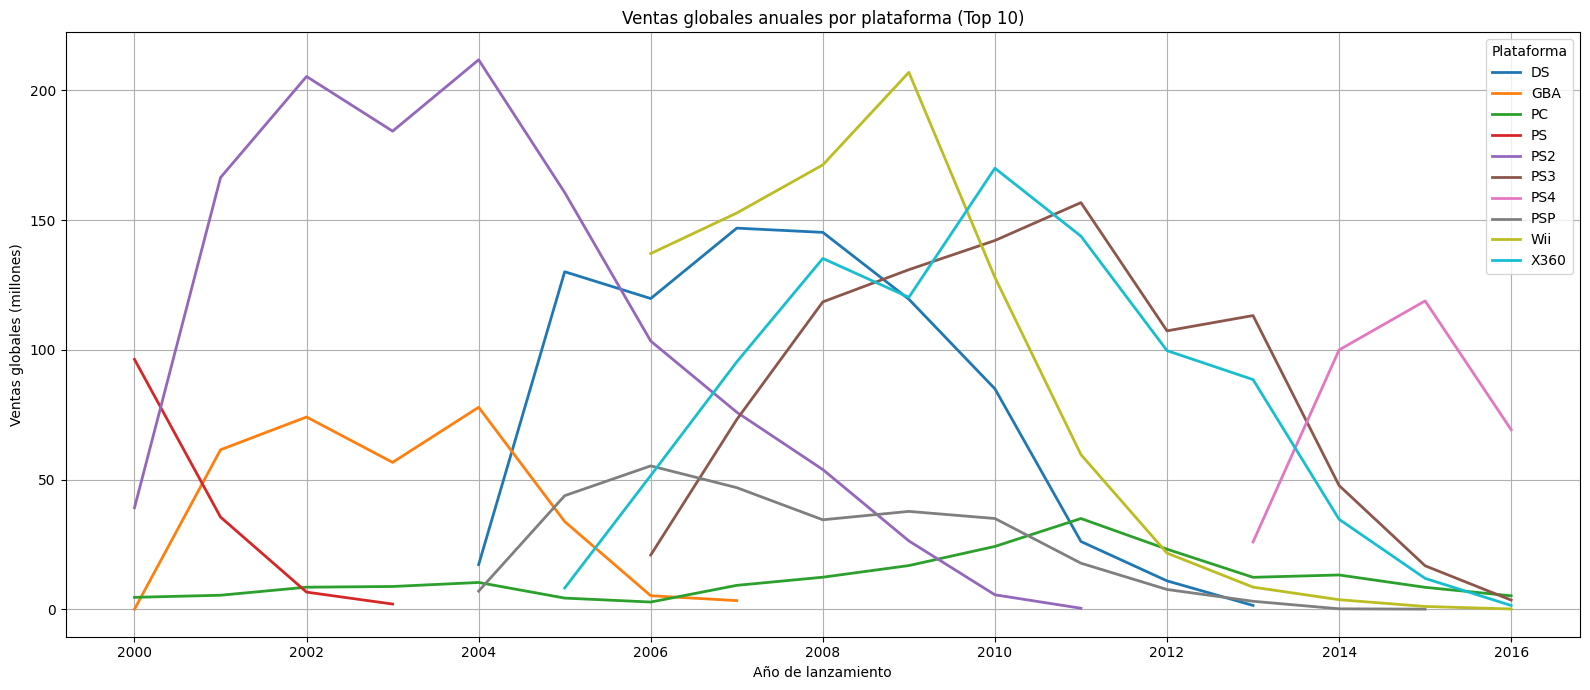

In [10]:
import matplotlib.pyplot as plt

# Obtener lista de las 10 plataformas principales
top10_platforms = top_platforms.index.tolist()

# Filtrar los juegos correspondientes a esas plataformas
filtered_games_top10 = games[games['platform'].isin(top10_platforms)]

# Crear tabla dinámica: ventas por año y plataforma
platform_sales_by_year_top10 = filtered_games_top10.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
)

# Graficar desde el año 2000
platform_sales_by_year_top10.loc[2000:].plot(
    figsize=(16, 7),
    title='Ventas globales anuales por plataforma (Top 10)',
    linewidth=2
)
plt.ylabel('Ventas globales (millones)')
plt.xlabel('Año de lanzamiento')
plt.grid(True)
plt.legend(title='Plataforma')
plt.tight_layout()
plt.show()


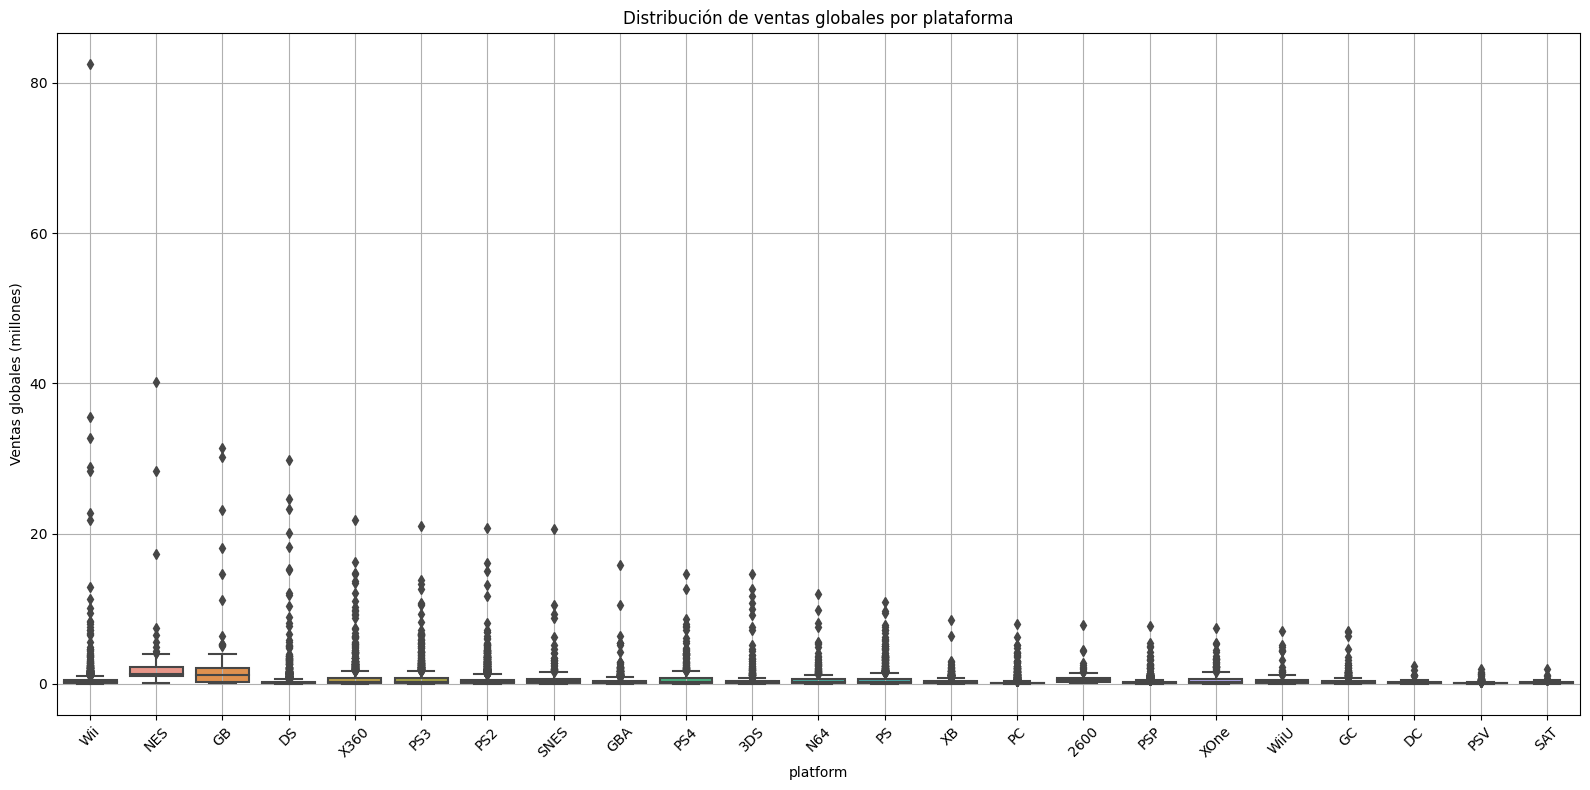

In [11]:


# Filtrar plataformas con al menos 50 juegos para evitar sesgos por pocas observaciones
platform_counts = games['platform'].value_counts()
major_platforms = platform_counts[platform_counts >= 50].index
filtered_games_box = games[games['platform'].isin(major_platforms)]

# Diagrama de caja
plt.figure(figsize=(16, 8))
sns.boxplot(data=filtered_games_box, x='platform', y='total_sales')
plt.xticks(rotation=45)
plt.title('Distribución de ventas globales por plataforma')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b>Celdas [10–11]</b> <a class="tocSkip"></a><br>
Muy buen uso de gráficos para comparar la evolución de ventas por plataforma y analizar su distribución. La selección de plataformas relevantes con al menos 50 juegos evita conclusiones poco representativas. Además, la visualización con boxplots permite identificar claramente el comportamiento de outliers, lo cual es clave para entender la dinámica real del mercado de videojuegos.
</div>


La gran mayoría de los juegos, sin importar la plataforma, tienen ventas menores a 1 millón de unidades.
Esto indica que solo un pequeño porcentaje de juegos logra destacar comercialmente.
Algunas plataformas como Wii, NES, DS, GB, X360 y PS2 tienen numerosos outliers que superan los 10 millones de unidades,
llegando hasta 80 millones (posiblemente Wii Sports).Estas plataformas tuvieron juegos icónicos con altísimas ventas.
La mediana de ventas (la línea dentro de cada caja) es baja en casi todas las plataformas, indicando que la mayoría de los juegos tienen un desempeño modesto.
No hay grandes diferencias en la mediana, pero sí en los outliers y el rango intercuartílico (IQR).
Wii, NES, DS y GB presentan una distribución más dispersa, lo cual sugiere una mayor variabilidad entre títulos exitosos y los que no lo fueron.

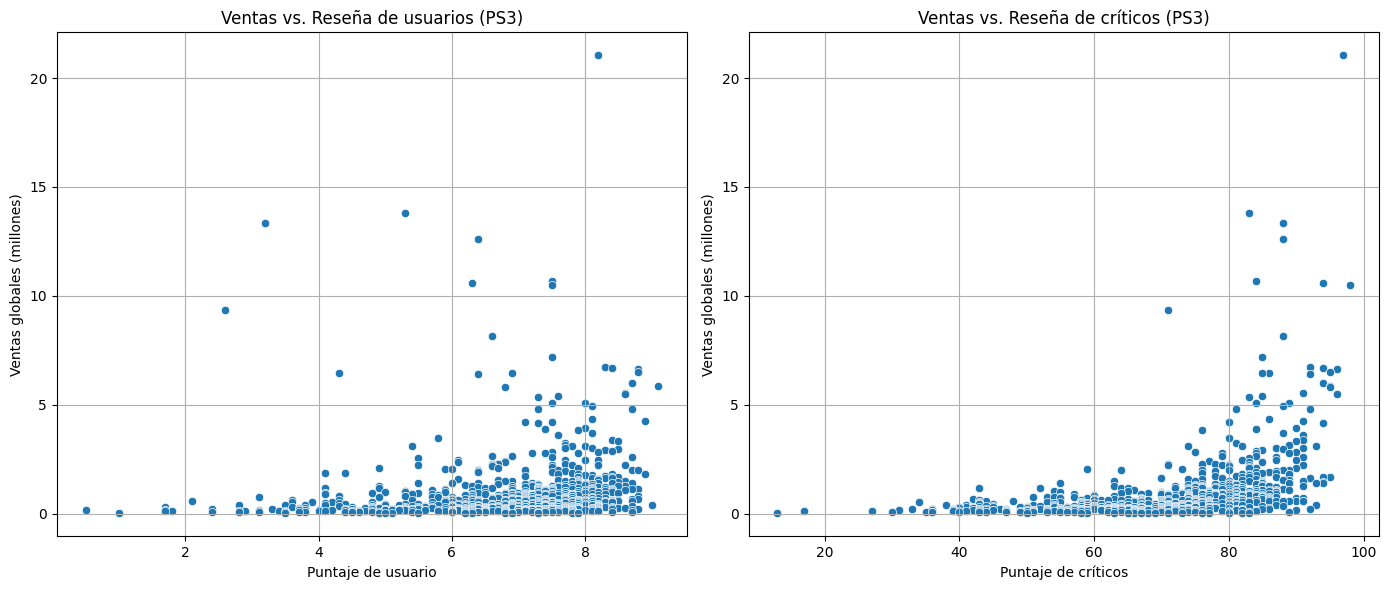

Correlación entre reseñas de usuarios y ventas (PS3): 0.14
Correlación entre reseñas de críticos y ventas (PS3): 0.43


In [12]:
# Filtrar juegos de PS3 con reseñas y ventas válidas
ps3_games = games[
    (games['platform'] == 'PS3') &
    (games['user_score'].notna()) &
    (games['critic_score'].notna())
]

# Graficar la relación entre críticas de usuarios y ventas
plt.figure(figsize=(14, 6))

# Usuario
plt.subplot(1, 2, 1)
sns.scatterplot(data=ps3_games, x='user_score', y='total_sales')
plt.title('Ventas vs. Reseña de usuarios (PS3)')
plt.xlabel('Puntaje de usuario')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)

# Crítica profesional
plt.subplot(1, 2, 2)
sns.scatterplot(data=ps3_games, x='critic_score', y='total_sales')
plt.title('Ventas vs. Reseña de críticos (PS3)')
plt.xlabel('Puntaje de críticos')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Calcular correlación
user_corr = ps3_games['user_score'].corr(ps3_games['total_sales'])
critic_corr = ps3_games['critic_score'].corr(ps3_games['total_sales'])

print(f"Correlación entre reseñas de usuarios y ventas (PS3): {user_corr:.2f}")
print(f"Correlación entre reseñas de críticos y ventas (PS3): {critic_corr:.2f}")


<div class="alert alert-block alert-warning">
<b>Celdas [12]</b> <a class="tocSkip"></a><br>
Aunque se realiza correctamente el análisis de correlación entre <code>score</code> y <code>total_sales</code>, sería conveniente agregar una interpretación más crítica de los coeficientes hallados (0.14 y 0.43). Por ejemplo, explicar que 0.43 representa una correlación moderada y no necesariamente una relación causal directa ayudaría a enriquecer el análisis.
</div>


Top 5 plataformas en NA:
 platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Top 5 plataformas en UE:
 platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Top 5 plataformas en JP:
 platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64
Top 5 géneros en NA:
 genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Top 5 géneros en UE:
 genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Top 5 géneros en JP:
 genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64
Ventas por clasificación ESRB y región:

        na_sales  eu_sales  jp_sales
rating            

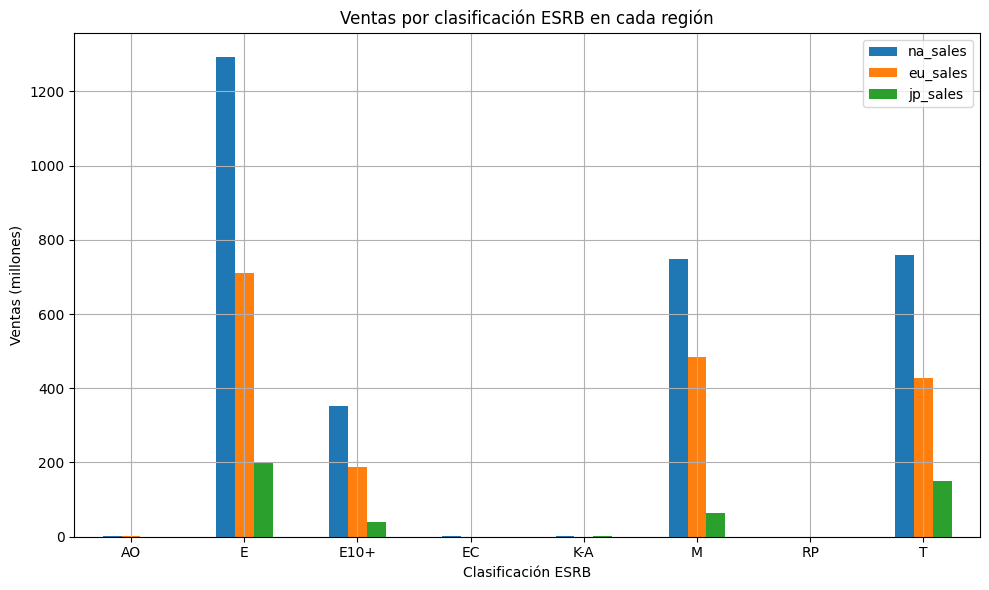

In [13]:
#Paso 4. Crea un perfil de usuario para cada región

# Top 5 plataformas por región
top_platforms_na = games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_eu = games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_jp = games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("Top 5 plataformas en NA:\n", top_platforms_na)
print("\nTop 5 plataformas en UE:\n", top_platforms_eu)
print("\nTop 5 plataformas en JP:\n", top_platforms_jp)


# Top 5 géneros por región
top_genres_na = games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu = games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp = games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("Top 5 géneros en NA:\n", top_genres_na)
print("\nTop 5 géneros en UE:\n", top_genres_eu)
print("\nTop 5 géneros en JP:\n", top_genres_jp)


# Agrupamos por rating y sumamos las ventas por región
rating_sales = games.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

print("Ventas por clasificación ESRB y región:\n")
print(rating_sales)

rating_sales.plot(kind='bar', figsize=(10, 6), title='Ventas por clasificación ESRB en cada región')
plt.ylabel('Ventas (millones)')
plt.xlabel('Clasificación ESRB')
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



<div class="alert alert-block alert-success">
<b>Celdas [13]</b> <a class="tocSkip"></a><br>
Excelente enfoque al construir perfiles regionales diferenciados. El análisis de plataformas, géneros y clasificaciones ESRB por región está muy bien estructurado y revela patrones claros. Además, se reconoce adecuadamente la limitación del uso de la ESRB en Japón, lo cual denota comprensión del contexto cultural y del negocio.
</div>


En NA, los juegos con clasificación M (Mature) y E (Everyone) venden más.

En UE, se observan patrones similares.

En Japón, la clasificación ESRB tiene menos impacto ya que muchas ventas son locales y usan otras clasificaciones (como CERO).



**Paso 1: Hipótesis — Comparación entre plataformas Xbox One y PC
Hipótesis:**

Hipótesis nula (H₀): Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.
Hipótesis alternativa (H₁): Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.

**Criterio:**
Usaremos el test t para muestras independientes (scipy.stats.ttest_ind) ya que comparamos dos grupos independientes (plataformas).
Umbral de significancia α = 0.05.

**Paso 2: Hipótesis — Comparación entre géneros Acción y Deportes
Hipótesis:**

Hipótesis nula (H₀): Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son iguales.
Hipótesis alternativa (H₁): Las calificaciones promedio para ambos géneros son diferentes.

**Criterio:**
También usaremos el test t para muestras independientes.
Umbral de significancia α = 0.05.



In [14]:
#Paso 5. probaremos las siguientes hipótesis:

games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')


xone_scores = games[games['platform'] == 'XOne']['user_score'].dropna()
pc_scores = games[games['platform'] == 'PC']['user_score'].dropna()



# Prueba t
alpha = 0.05
results = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)

print('p-valor:', results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: las medias son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: las medias son iguales.")

    
    
action_scores = games[games['genre'] == 'Action']['user_score'].dropna()
sports_scores = games[games['genre'] == 'Sports']['user_score'].dropna()



# Prueba t
results2 = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

print('p-valor:', results2.pvalue)
if results2.pvalue < alpha:
    print("Rechazamos la hipótesis nula: las medias son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: las medias son iguales.")





p-valor: 4.935072360183574e-06
Rechazamos la hipótesis nula: las medias son diferentes.
p-valor: 0.11483818791498286
No se puede rechazar la hipótesis nula: las medias son iguales.


<div class="alert alert-block alert-warning">
<b>Celdas [14]</b> <a class="tocSkip"></a><br>
Las pruebas de hipótesis están bien formuladas y ejecutadas con el método adecuado (<code>ttest_ind</code>), pero sería útil reforzar la interpretación de los p-valores. Por ejemplo, un valor de p muy pequeño (<0.00001) como el observado entre Xbox One y PC merece destacarse como evidencia fuerte, mientras que en el segundo caso (p=0.11) puede comentarse que no se alcanza significancia estadística pero podría explorarse más con mayor tamaño muestral o pruebas no paramétricas si la distribución lo requiere.
</div>




***Conclusión General***

Este análisis exploratorio de datos sobre ventas de videojuegos nos permitió identificar factores clave que influyen en el éxito comercial de un título, utilizando información histórica hasta diciembre de 2016.

### Preparación de los Datos

* Se estandarizaron nombres de columnas, se corrigieron tipos de datos y se trataron valores ausentes.
* Se creó una nueva columna `total_sales` sumando ventas regionales, útil para análisis agregados.
* Los valores "TBD" en `user_score` fueron excluidos al no representar calificaciones reales.

### Análisis General de Datos

* La mayoría de los juegos se lanzaron entre 2000 y 2016; los datos anteriores no son representativos.
* Se eligió el periodo de **2011 a 2016** como base para análisis predictivo de 2017, ya que incluye las plataformas activas y relevantes.
* Las plataformas con mayores ventas globales en este período fueron **PS2, Xbox 360, PS3, Wii y DS**, aunque las más recientes como **PS4 y XOne** mostraron crecimiento constante.
* Muchas plataformas muestran un ciclo de vida de aproximadamente 10 años, desde su auge hasta su declive.

### Análisis de Ventas por Plataforma y Género

* Las ventas globales varían significativamente entre plataformas; **PS4 y XOne** presentan buenas proyecciones para el futuro cercano.
* Los géneros **Acción**, **Deportes** y **Disparos** fueron los más rentables en ventas, aunque el género **Acción** mostró la mayor cantidad de títulos lanzados.
* El análisis de cajas (boxplot) confirmó la alta dispersión de ventas y la presencia de títulos "éxito de ventas" (outliers).

### Perfil Regional

* **Norteamérica (NA):** domina con preferencia por plataformas como X360, PS3, Wii y géneros de Acción y Deportes.
* **Europa (EU):** similar a NA pero con mayor peso en plataformas de Sony (PS4, PS3).
* **Japón (JP):** marcado contraste: dominio de plataformas portátiles como 3DS y géneros como RPG.
* La clasificación **ESRB** tiene distinto impacto según la región: en NA influye más en ventas que en JP.

### Pruebas de Hipótesis

* **Hipótesis 1 (Xbox One vs PC):** Se concluyó que **las calificaciones promedio de usuarios son diferentes** (p < 0.05).
* **Hipótesis 2 (Acción vs Deportes):** No hubo evidencia suficiente para afirmar diferencia significativa en las calificaciones promedio (p > 0.05).

---

### Recomendaciones para 2017

1. **Foco en plataformas activas y en crecimiento:** PS4 y XOne.
2. **Invertir en géneros populares:** Acción y Disparos, sin descuidar RPG en mercados asiáticos.
3. **Personalizar campañas por región:** considerando gustos, plataformas y sensibilidad a clasificaciones ESRB.
4. **Monitorear reseñas de usuarios y críticos:** especialmente en plataformas donde influyen fuertemente en ventas.


<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Buen trabajo, Joel! El proyecto está bien estructurado, con un flujo lógico y decisiones técnicas acertadas en el tratamiento de datos y análisis. Se destacan la calidad de las visualizaciones, el enfoque regional diferenciado y el uso correcto de pruebas estadísticas.  

Sigue trabajando con este nivel de detalle y claridad. ¡Vas por excelente camino!
</div>
